    * Actor Credits
    * Director Credits
    * Executive Producer Credits
    * Producer Credits
    * Screenplay Credits
    * Total Credits (de-duplicated)
    * Projects with [Abuser 1]
    * Projects with [Abuser 2]
    * Projects with ...
    * Projects with [Abuser n]

In [1]:
import pandas as pd
import numpy as np
import csv
import json
import urllib
import requests
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.plotly as py
from plotly.graph_objs import *
import networkx as nx

In [3]:
dict1 = {'a': 'apple', 
         'b': 'banana', 
         'c': 'cucumber', 
         'd': 'daikon'}

df1 = pd.DataFrame(dict1, index = [0])
df1

,a,b,c,d
0,apple,banana,cucumber,daikon


In [4]:
df2 = df1.transpose()
df2

,0
a,apple
b,banana
c,cucumber
d,daikon


In [3]:
# Import CSV of abusers' filmography

df_filmography = pd.read_csv('../data/abusers_filmography.csv')
df_filmography.head()

,imdb_id,name,role,title,type,url,year
0,tt0368008,Al Franken,actor,The Manchurian Candidate,Film,http://www.imdb.com/title/tt0368008/,2004
1,tt0120570,Al Franken,actor,From the Earth to the MoonCan We Do This?,Film,http://www.imdb.com/title/tt0120570/,1998
2,tt0167880,Al Franken,actor,The Definite Maybe,Film,http://www.imdb.com/title/tt0167880/,1997
3,tt0114571,Al Franken,actor,Stuart Saves His Family,Film,http://www.imdb.com/title/tt0114571/,1995
4,tt0111693,Al Franken,actor,When a Man Loves a Woman,Film,http://www.imdb.com/title/tt0111693/,1994


In [4]:
# Drop all columns except for 'imdb_id'

df_filmography.drop(['name', 'role', 'title', 'type', 'url', 'year'], axis = 1)

# Drop duplicate films

df_filmography.drop_duplicates(keep = 'first', inplace = True)

In [5]:
# Create list of film IDs from 'imdb_id' column in `df_films`

film_imdb_ids = df_filmography['imdb_id'].tolist()
film_imdb_ids

['tt0368008',
 'tt0120570',
 'tt0167880',
 'tt0114571',
 'tt0111693',
 'tt2248903',
 'tt0303111',
 'tt0091681',
 'tt2967372',
 'tt0086465',
 'tt0077147',
 'tt0075357',
 'tt0266934',
 'tt0111693',
 'tt0424406',
 'tt0274793',
 'tt0344303',
 'tt1003289',
 'tt0899167',
 'tt0442668',
 'tt0266934',
 'tt0500149',
 'tt0500100',
 'tt0500148',
 'tt0114571',
 'tt0268875',
 'tt0111693',
 'tt0424406',
 'tt2248845',
 'tt2244923',
 'tt0274793',
 'tt0196072',
 'tt0344303',
 'tt1051977',
 'tt0496482',
 'tt0310736',
 'tt0091681',
 'tt0088790',
 'tt0333467',
 'tt0356076',
 'tt0078888',
 'tt0336994',
 'tt6932874',
 'tt4426464',
 'tt4912910',
 'tt5640036',
 'tt3294746',
 'tt5037840',
 'tt6469960',
 'tt1217217',
 'tt1935089',
 'tt3874544',
 'tt1974420',
 'tt4429194',
 'tt3349772',
 'tt3322364',
 'tt4073890',
 'tt2381249',
 'tt1243974',
 'tt3321428',
 'tt3316960',
 'tt2334873',
 'tt1721672',
 'tt1446192',
 'tt1336608',
 'tt3267158',
 'tt1859650',
 'tt1205558',
 'tt6454770',
 'tt1230414',
 'tt1078588',
 'tt04

In [32]:
testlist = ['tt0368008', 'tt0120570', 'tt0167880', 'tt0114571', 'tt0111693', 'tt2248903',
            'tt0303111', 'tt0091681', 'tt2967372', 'tt0086465', 'tt0077147', 'tt0075357',
            'tt0266934', 'tt0111693', 'tt0424406', 'tt0274793', 'tt0344303', 'tt1003289',
            'tt0899167', 'tt0442668', 'tt0266934', 'tt0500149', 'tt0500100', 'tt0500148',
            'tt0114571', 'tt0268875', 'tt0111693', 'tt0424406', 'tt2248845', 'tt2244923',
            'tt0274793', 'tt0196072', 'tt0344303', 'tt1051977', 'tt0496482', 'tt0310736',
            'tt0091681', 'tt0088790', 'tt0333467', 'tt0356076', 'tt0078888', 'tt0336994',
            'tt6932874', 'tt4426464', 'tt4912910']

len(testlist)

45

In [46]:
# TEST time.sleep

import urllib
import requests

imdb_api = 'http://www.theimdbapi.org/api/movie?'

test_id_urls = {}
for e, i in enumerate(testlist):
    urls = imdb_api + urllib.parse.urlencode({'movie_id': i})
    test_id_urls[i] = urls

# test_id_urls

In [47]:
testdict = {}
for e, i in enumerate(testlist):
    for t, u in test_id_urls.items():
        if i == t:
            test_json = [requests.get(u).json()]
            title = test_json[[0]['title']]
            testdict[t] = title
    
    if e % 5 == 0:
        time.sleep(5)

testdict

TypeError: list indices must be integers or slices, not str

In [51]:
import urllib
import requests
import time

In [48]:
testlist1 = ['https://api.themoviedb.org/3/movie/tt0484500?api_key=21acf1b7274aa72fe97cd9acc7eb382a&external_source=imdb_id',
 'https://api.themoviedb.org/3/movie/tt0118577?api_key=21acf1b7274aa72fe97cd9acc7eb382a&external_source=imdb_id',
 'https://api.themoviedb.org/3/movie/tt0271527?api_key=21acf1b7274aa72fe97cd9acc7eb382a&external_source=imdb_id',
 'https://api.themoviedb.org/3/movie/tt0091767?api_key=21acf1b7274aa72fe97cd9acc7eb382a&external_source=imdb_id',
 'https://api.themoviedb.org/3/movie/tt2140507?api_key=21acf1b7274aa72fe97cd9acc7eb382a&external_source=imdb_id',
 'https://api.themoviedb.org/3/movie/tt1987680?api_key=21acf1b7274aa72fe97cd9acc7eb382a&external_source=imdb_id',
 'https://api.themoviedb.org/3/movie/tt0491203?api_key=21acf1b7274aa72fe97cd9acc7eb382a&external_source=imdb_id',
 'https://api.themoviedb.org/3/movie/tt1935897?api_key=21acf1b7274aa72fe97cd9acc7eb382a&external_source=imdb_id',
 'https://api.themoviedb.org/3/movie/tt2932536?api_key=21acf1b7274aa72fe97cd9acc7eb382a&external_source=imdb_id',
 'https://api.themoviedb.org/3/movie/tt6133034?api_key=21acf1b7274aa72fe97cd9acc7eb382a&external_source=imdb_id',
 'https://api.themoviedb.org/3/movie/tt5362988?api_key=21acf1b7274aa72fe97cd9acc7eb382a&external_source=imdb_id',
 'https://api.themoviedb.org/3/movie/tt1800302?api_key=21acf1b7274aa72fe97cd9acc7eb382a&external_source=imdb_id',
 'https://api.themoviedb.org/3/movie/tt4276820?api_key=21acf1b7274aa72fe97cd9acc7eb382a&external_source=imdb_id',
 'https://api.themoviedb.org/3/movie/tt3741834?api_key=21acf1b7274aa72fe97cd9acc7eb382a&external_source=imdb_id',
 'https://api.themoviedb.org/3/movie/tt1655461?api_key=21acf1b7274aa72fe97cd9acc7eb382a&external_source=imdb_id',
 'https://api.themoviedb.org/3/movie/tt2597892?api_key=21acf1b7274aa72fe97cd9acc7eb382a&external_source=imdb_id',
 'https://api.themoviedb.org/3/movie/tt1781827?api_key=21acf1b7274aa72fe97cd9acc7eb382a&external_source=imdb_id']

In [53]:
testdict1 = {}
for e, u in enumerate(testlist1):    
    if e % 3 == 0:
        time.sleep(2)
        print('sleep')
        
    test_json = [requests.get(u).json()]
    
    moviedb_id = test_json[0]['id']
    imdb_id = test_json[0]['imdb_id']
    
    testdict1[imdb_id] = moviedb_id

testdict1

sleep
sleep
sleep
sleep
sleep
sleep


{'tt0091767': 40227,
 'tt0118577': 78149,
 'tt0271527': 101538,
 'tt0484500': 103434,
 'tt0491203': 257785,
 'tt1655461': 406992,
 'tt1781827': 184341,
 'tt1800302': 334524,
 'tt1935897': 203835,
 'tt1987680': 440472,
 'tt2140507': 418879,
 'tt2597892': 336455,
 'tt2932536': 403119,
 'tt3741834': 334543,
 'tt4276820': 310307,
 'tt5362988': 395834,
 'tt6133034': 444528}

In [ ]:
#    if e % 5 == 0:
#        time.sleep(5)
#    
#    for i, u in weinstein_moviedb_urls.items():
#        if l == i:
#            films_dict_1[l] = u
#        else:
#            pass

In [ ]:
# Loop through `films_dict_1` to create dataframe of 'imdb_id' and 'moviedb_id'

imdb_moviedb_ids_1 = {}
for i, u in films_dict_1.items():
    moviedb_json = [requests.get(u).json()]
    moviedb = moviedb_json[0]['id']
    imdb_moviedb_ids_1[i] = moviedb

# debugging: len(imdb_moviedb_ids_1)


In [ ]:
# Loop through `weinstein_person_ids` to corresponding IMDB ID for each person

weinstein_person_lookup = {}
for e, i in enumerate(weinstein_person_ids):
    person_url = moviedb_person + str(i) + '?' + urllib.parse.urlencode({'api_key': moviedb_key})
    
    # Get past API request limit of 40 requests per 10 seconds this way
    
    if e % 40 == 0:
        time.sleep(5)
        
    person_json = requests.get(person_url).json()
    
    # Parse JSON and set to dictionary
    
    try:
        imdb_id = person_json['imdb_id']
    except KeyError:
        pass
    weinstein_person_lookup[i] = imdb_id

# debugging: weinstein_person_lookup

In [8]:
# Loop through `film_imdb_ids` to create dictionary for corresponding MovieDB API URLs

moviedb_id = "https://api.themoviedb.org/3/movie/"
moviedb_key = '21acf1b7274aa72fe97cd9acc7eb382a'

film_imdb_moviedb_ids = {}
for f in film_imdb_ids:
    result = moviedb_id + f + "?" + urllib.parse.urlencode({'api_key': moviedb_key}) + "&external_source=imdb_id"
    
    # Create `film_imdb_moviedb_ids` dictionary
    
    imdb = f
    moviedb = result
    film_imdb_moviedb_ids[imdb] = moviedb

film_imdb_moviedb_ids

{'tt0368008': 'https://api.themoviedb.org/3/movie/tt0368008?api_key=21acf1b7274aa72fe97cd9acc7eb382a&external_source=imdb_id',
 'tt0120570': 'https://api.themoviedb.org/3/movie/tt0120570?api_key=21acf1b7274aa72fe97cd9acc7eb382a&external_source=imdb_id',
 'tt0167880': 'https://api.themoviedb.org/3/movie/tt0167880?api_key=21acf1b7274aa72fe97cd9acc7eb382a&external_source=imdb_id',
 'tt0114571': 'https://api.themoviedb.org/3/movie/tt0114571?api_key=21acf1b7274aa72fe97cd9acc7eb382a&external_source=imdb_id',
 'tt0111693': 'https://api.themoviedb.org/3/movie/tt0111693?api_key=21acf1b7274aa72fe97cd9acc7eb382a&external_source=imdb_id',
 'tt2248903': 'https://api.themoviedb.org/3/movie/tt2248903?api_key=21acf1b7274aa72fe97cd9acc7eb382a&external_source=imdb_id',
 'tt0303111': 'https://api.themoviedb.org/3/movie/tt0303111?api_key=21acf1b7274aa72fe97cd9acc7eb382a&external_source=imdb_id',
 'tt0091681': 'https://api.themoviedb.org/3/movie/tt0091681?api_key=21acf1b7274aa72fe97cd9acc7eb382a&external_s

In [14]:
len(film_imdb_moviedb_ids)

5338

In [16]:
# Loop through `film_imdb_moviedb_ids` in the MovieDB API to access corresponding MovieDB ID for IMDb ID lookup

film_imdb_moviedb_id_lookup = {}
for i, m in film_imdb_moviedb_ids.items():
    moviedb_json = requests.get(m).json()
    
    # Create `film_moviedb_ids` dictionary
    
    try:
        moviedb_id = moviedb_json['id']
        film_imdb_moviedb_id_lookup[i] = moviedb_id
    except KeyError:
        pass

film_imdb_moviedb_id_lookup

{'tt0368008': 14462,
 'tt0120570': 30983,
 'tt0167880': 301374,
 'tt0114571': 28033,
 'tt0111693': 10449,
 'tt0303111': 464654,
 'tt0091681': 86662,
 'tt0086465': 1621,
 'tt0077147': 16378,
 'tt0075357': 114255,
 'tt0344303': 454330,
 'tt1003289': 337559,
 'tt0899167': 347103,
 'tt0500149': 269535,
 'tt0500100': 286500,
 'tt0500148': 331372,
 'tt0333467': 335035,
 'tt0356076': 275521,
 'tt6932874': 459151,
 'tt4426464': 416153,
 'tt4912910': 353081,
 'tt3294746': 331986,
 'tt5037840': 369560,
 'tt0116410': 31908,
 'tt0116508': 36915,
 'tt0116731': 9623,
 'tt0114565': 133021,
 'tt0114753': 40628,
 'tt0111143': 8850,
 'tt0109890': 2087,
 'tt0107497': 2246,
 'tt0104348': 9504,
 'tt0105165': 2613,
 'tt0102411': 31633,
 'tt0099012': 8217,
 'tt0100143': 14931,
 'tt0099810': 1669,
 'tt0097457': 11465,
 'tt0096219': 10132,
 'tt0096463': 3525,
 'tt0095593': 2321,
 'tt0094721': 4011,
 'tt0096094': 12714,
 'tt0093042': 362228,
 'tt0092527': 282040,
 'tt0090974': 168852,
 'tt0089514': 303648,
 'tt

In [17]:
len(film_imdb_moviedb_id_lookup)

2248

In [18]:
# Convert `film_imdb_moviedb_id_lookup` dictionary to dataframe

df_film_imdb_moviedb_id_lookup = pd.DataFrame(film_imdb_moviedb_id_lookup, index = [0])
df_film_imdb_moviedb_id_lookup = df_film_imdb_moviedb_id_lookup.transpose().reset_index()
df_film_imdb_moviedb_id_lookup.columns = ['imdb_id', 'moviedb_id']

# Create new CSV

df_film_imdb_moviedb_id_lookup.to_csv('../data/imdb_moviedb_id_lookup.csv', index = False)

In [11]:
tempdict = {'tt0368008': 14462, 'tt0120570': 30983, 'tt0167880': 301374,
            'tt0114571': 28033, 'tt0111693': 10449, 'tt0303111': 464654,
            'tt0091681': 86662, 'tt0086465': 1621, 'tt0077147': 16378,
            'tt0075357': 114255, 'tt0344303': 454330, 'tt1003289': 337559,
            'tt0899167': 347103, 'tt0500149': 269535, 'tt0500100': 286500, 
            'tt0500148': 331372, 'tt0333467': 335035,}

tempdict

{'tt0075357': 114255,
 'tt0077147': 16378,
 'tt0086465': 1621,
 'tt0091681': 86662,
 'tt0111693': 10449,
 'tt0114571': 28033,
 'tt0120570': 30983,
 'tt0167880': 301374,
 'tt0303111': 464654,
 'tt0333467': 335035,
 'tt0344303': 454330,
 'tt0368008': 14462,
 'tt0500100': 286500,
 'tt0500148': 331372,
 'tt0500149': 269535,
 'tt0899167': 347103,
 'tt1003289': 337559}

In [12]:
templist = list(tempdict.keys())

templist

['tt0368008',
 'tt0120570',
 'tt0167880',
 'tt0114571',
 'tt0111693',
 'tt0303111',
 'tt0091681',
 'tt0086465',
 'tt0077147',
 'tt0075357',
 'tt0344303',
 'tt1003289',
 'tt0899167',
 'tt0500149',
 'tt0500100',
 'tt0500148',
 'tt0333467']

In [ ]:
temp1 = {}
for l in weinstein_films_list[0:40]:
    for i, u in weinstein_moviedb_urls.items():
        if l == i:
            films_dict_1[l] = u
        else:
            pass

In [15]:
chunks = [templist[x:x+3] for x in range(0, len(templist), 3)]

In [13]:
chunks

[['tt0368008', 'tt0120570', 'tt0167880'],
 ['tt0114571', 'tt0111693', 'tt0303111'],
 ['tt0091681', 'tt0086465', 'tt0077147'],
 ['tt0075357', 'tt0344303', 'tt1003289'],
 ['tt0899167', 'tt0500149', 'tt0500100']]

In [8]:
chunks[0]

['tt0368008', 'tt0120570', 'tt0167880']

In [10]:
chunks[0][0]

'tt0368008'

In [28]:
for i in chunks:
    for j in i:
        for a, b in tempdict.items{}:
            

tt0368008
tt0120570
tt0167880
tt0114571
tt0111693
tt0303111
tt0091681
tt0086465
tt0077147
tt0075357
tt0344303
tt1003289
tt0899167
tt0500149
tt0500100
tt0500148
tt0333467


In [26]:
for x in range(0, len(templist), 3):
    suffixes = ['a', 'b', 'c', 'd', 'e', 'f']
    for i in suffixes:
        temp1 = [templist[x:x+3]] 
temp1

[['tt0500148', 'tt0333467']]

In [112]:
# Create 40-chunk dictionaries from film lists and `weinstein_moviedb_urls` because I'm hitting API issues

films_dict_1 = {}
for l in weinstein_films_list[0:40]:
    for i, u in weinstein_moviedb_urls.items():
        if l == i:
            films_dict_1[l] = u
        else:
            pass

# There's probably an iterative way to do this but I'm lazy right now

films_dict_2 = {}
for l in weinstein_films_list[40:80]:
    for i, u in weinstein_moviedb_urls.items():
        if l == i:
            films_dict_2[l] = u
        else:
            pass

films_dict_3 = {}
for l in weinstein_films_list[80:120]:
    for i, u in weinstein_moviedb_urls.items():
        if l == i:
            films_dict_3[l] = u
        else:
            pass
        
films_dict_4 = {}
for l in weinstein_films_list[120:160]:
    for i, u in weinstein_moviedb_urls.items():
        if l == i:
            films_dict_4[l] = u
        else:
            pass
        
films_dict_5 = {}
for l in weinstein_films_list[160:200]:
    for i, u in weinstein_moviedb_urls.items():
        if l == i:
            films_dict_5[l] = u
        else:
            pass
        
films_dict_6 = {}
for l in weinstein_films_list[200:240]:
    for i, u in weinstein_moviedb_urls.items():
        if l == i:
            films_dict_6[l] = u
        else:
            pass
        
films_dict_7 = {}
for l in weinstein_films_list[240:280]:
    for i, u in weinstein_moviedb_urls.items():
        if l == i:
            films_dict_7[l] = u
        else:
            pass
        
films_dict_8 = {}
for l in weinstein_films_list[280:]:
    for i, u in weinstein_moviedb_urls.items():
        if l == i:
            films_dict_8[l] = u
        else:
            pass

In [139]:
# Loop through `films_dict_1` to create dataframe of 'imdb_id' and 'moviedb_id'

imdb_moviedb_ids_1 = {}
for i, u in films_dict_1.items():
    moviedb_json = [requests.get(u).json()]
    moviedb = moviedb_json[0]['id']
    imdb_moviedb_ids_1[i] = moviedb

# debugging: len(imdb_moviedb_ids_1)

In [ ]:
# Loop through `films_dict_1` to create dataframe of 'imdb_id' and 'moviedb_id'

imdb_moviedb_ids_1 = {}
for i, u in films_dict_1.items():
    moviedb_json = [requests.get(u).json()]
    moviedb = moviedb_json[0]['id']
    imdb_moviedb_ids_1[i] = moviedb

# debugging: len(imdb_moviedb_ids_1)

In [151]:
# Concatenate `imdb_moviedb_ids_n` dictionaries into one dictionary

weinstein_film_lookup = {}
weinstein_film_lookup.update(imdb_moviedb_ids_1)
weinstein_film_lookup.update(imdb_moviedb_ids_2)
weinstein_film_lookup.update(imdb_moviedb_ids_3)
weinstein_film_lookup.update(imdb_moviedb_ids_4)
weinstein_film_lookup.update(imdb_moviedb_ids_5)
weinstein_film_lookup.update(imdb_moviedb_ids_6)
weinstein_film_lookup.update(imdb_moviedb_ids_7)
weinstein_film_lookup.update(imdb_moviedb_ids_8)

In [153]:
# Create dataframe of `df_film_id_lookup` from `film_id_lookup`

df_weinstein_film_lookup = pd.DataFrame(list(weinstein_film_lookup.items()), columns = ['imdb_id', 'moviedb_id'])

# debugging: df_weinstein_film_lookup

In [ ]:
# Drop rows where 'imdb_id' does not begin with 'nm'

df_weinstein_person_lookup = df_weinstein_person_lookup[(df_weinstein_person_lookup['imdb_id'].str.startswith('nm'))]

In [ ]:
test10 = {'a': 'apple', 'b': 'banana', 'c': 'cucumber', 'd': 'daikon', 
          'e': 'eggplant', 'f': 'fig', 'g': 'grapefruit', 'h': 'horesradish', 
          'i': 'i something', 'j': 'jalepeno', 'k': 'k something', 'l': 'lemon'}

In [26]:
import plotly
import plotly.plotly as py
from plotly.graph_objs import *

import networkx as nx

plotly.tools.set_credentials_file(username = 'kathyvsinternet', api_key='YvxrrEG6wGKmBrvspLv0')

In [35]:
G = nx.random_geometric_graph(200, 0.125)
pos = nx.get_node_attributes(G, 'pos')

dmin = 1
ncenter = 0
for n in pos:
    x,y = pos[n]
    d = (x - 0.5)**2 + (y - 0.5)**2
    if d < dmin:
        ncenter = n
        dmin = d

p = nx.single_source_shortest_path_length(G, ncenter)

In [37]:
edge_trace = Scatter(
    x = [],
    y = [],
    line = Line(width = 0.5,color = '#888'),
    hoverinfo = 'none',
    mode = 'lines')

for edge in G.edges():
    x0, y0 = G.node[edge[0]]['pos']
    x1, y1 = G.node[edge[1]]['pos']
    edge_trace['x'] += [x0, x1, None]
    edge_trace['y'] += [y0, y1, None]

node_trace = Scatter(
    x = [],
    y = [],
    text = [],
    mode = 'markers',
    hoverinfo = 'text',
    marker = Marker(
        showscale=True,
        # colorscale options
        # 'Greys' | 'Greens' | 'Bluered' | 'Hot' | 'Picnic' | 'Portland' |
        # Jet' | 'RdBu' | 'Blackbody' | 'Earth' | 'Electric' | 'YIOrRd' | 'YIGnBu'
        colorscale = 'YIGnBu',
        reversescale = True,
        color = [],
        size = 10,
        colorbar = dict(
            thickness = 15,
            title = 'Node Connections',
            xanchor = 'left',
            titleside = 'right'
        ),
        line = dict(width = 2)))

for node in G.nodes():
    x, y = G.node[node]['pos']
    node_trace['x'].append(x)
    node_trace['y'].append(y)

In [38]:
for node, adjacencies in enumerate(G.adjacency_list()):
    node_trace['marker']['color'].append(len(adjacencies))
    node_info = '# of connections: '+str(len(adjacencies))
    node_trace['text'].append(node_info)

In [39]:
fig = Figure(data = Data([edge_trace, node_trace]),
             layout = Layout(
                title = '<br>Network graph made with Python',
                titlefont = dict(size = 16),
                showlegend = False,
                hovermode = 'closest',
                margin = dict(b = 20, l = 5, r = 5, t = 40),
                annotations=[ dict(
                    text="Python code: <a href='https://plot.ly/ipython-notebooks/network-graphs/'> https://plot.ly/ipython-notebooks/network-graphs/</a>",
                    showarrow = False,
                    xref = "paper", yref = "paper",
                    x=0.005, y=-0.002 ) ],
                xaxis = XAxis(showgrid =False, zeroline = False, showticklabels = False),
                yaxis = YAxis(showgrid =False, zeroline = False, showticklabels = False)))

py.iplot(fig, filename = 'networkx')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~kathyvsinternet/0 or inside your plot.ly account where it is named 'networkx'


Example below from https://programminghistorian.org/lessons/exploring-and-analyzing-network-data-with-python

In [1]:
import csv
import networkx as nx
from operator import itemgetter

In [6]:
with open('../not_using/test_data/quakers_nodelist.csv', 'r') as nodecsv: # Open the file                       
    nodereader = csv.reader(nodecsv) # Read the csv  
    # Retrieve the data (using Python list comprhension and list slicing to remove the header row, see footnote 3)
    nodes = [n for n in nodereader][1:]                     

node_names = [n[0] for n in nodes] # Get a list of only the node names                                       

with open('../not_using/test_data/quakers_edgelist.csv', 'r') as edgecsv: # Open the file
    edgereader = csv.reader(edgecsv) # Read the csv     
    edges = [tuple(e) for e in edgereader][1:] # Retrieve the data

In [4]:
nodereader

In [5]:
nodes

[['Joseph Wyeth', 'religious writer', 'male', '1663', '1731', '10013191'],
 ['Alexander Skene of Newtyle',
  'local politician and author',
  'male',
  '1621',
  '1694',
  '10011149'],
 ['James Logan',
  'colonial official and scholar',
  'male',
  '1674',
  '1751',
  '10007567'],
 ['Dorcas Erbery', 'Quaker preacher', 'female', '1656', '1659', '10003983'],
 ['Lilias Skene',
  'Quaker preacher and poet',
  'male',
  '1626',
  '1697',
  '10011152'],
 ['William Mucklow', 'religious writer', 'male', '1630', '1713', '10008595'],
 ['Thomas Salthouse',
  'Quaker preacher and writer',
  'male',
  '1630',
  '1691',
  '10010643'],
 ['William Dewsbury', 'Quaker activist', 'male', '1621', '1688', '10003478'],
 ['John Audland', 'Quaker preacher', 'male', '1630', '1664', '10000411'],
 ['Richard Claridge',
  'Quaker minister and schoolmaster',
  'male',
  '1649',
  '1723',
  '10002469'],
 ['William Bradford', 'printer', 'male', '1663', '1752', '10001445'],
 ['Fettiplace Bellers',
  'philosophical wri

In [7]:
node_names

['Joseph Wyeth',
 'Alexander Skene of Newtyle',
 'James Logan',
 'Dorcas Erbery',
 'Lilias Skene',
 'William Mucklow',
 'Thomas Salthouse',
 'William Dewsbury',
 'John Audland',
 'Richard Claridge',
 'William Bradford',
 'Fettiplace Bellers',
 'John Bellers',
 'Isabel Yeamans',
 'George Fox the younger',
 'George Fox',
 'John Stubbs',
 'Anne Camm',
 'John Camm',
 'Thomas Camm',
 'Katharine Evans',
 'Lydia Lancaster',
 'Samuel Clarridge',
 'Thomas Lower',
 'Gervase Benson',
 'Stephen Crisp',
 'James Claypoole',
 'Thomas Holme',
 'John Freame',
 'John Swinton',
 'William Mead',
 'Henry Pickworth',
 'John Crook',
 'Gilbert Latey',
 'Ellis Hookes',
 'Joseph Besse',
 'James Nayler',
 'Elizabeth Hooten',
 'George Whitehead',
 'John Whitehead',
 'William Crouch',
 'Benjamin Furly',
 'Silvanus Bevan',
 'Robert Rich',
 'John Whiting',
 'Christopher Taylor',
 'Thomas Lawson',
 'Richard Farnworth',
 'William Coddington',
 'Thomas Taylor',
 'Richard Vickris',
 'Robert Barclay',
 'Jane Sowle',
 'Ta

In [7]:
edges

[('George Keith', 'Robert Barclay'),
 ('George Keith', 'Benjamin Furly'),
 ('George Keith', 'Anne Conway Viscountess Conway and Killultagh'),
 ('George Keith', 'Franciscus Mercurius van Helmont'),
 ('George Keith', 'William Penn'),
 ('George Keith', 'George Fox'),
 ('George Keith', 'George Whitehead'),
 ('George Keith', 'William Bradford'),
 ('James Parnel', 'Benjamin Furly'),
 ('James Parnel', 'Stephen Crisp'),
 ('Peter Collinson', 'John Bartram'),
 ('Peter Collinson', 'James Logan'),
 ('Joseph Wyeth', 'Thomas Ellwood'),
 ('Alexander Skene of Newtyle', 'Lilias Skene'),
 ('Dorcas Erbery', 'James Nayler'),
 ('William Mucklow', 'George Fox'),
 ('Franciscus Mercurius van Helmont', 'Benjamin Furly'),
 ('William Dewsbury', 'Edward Burrough'),
 ('William Dewsbury', 'George Fox'),
 ('William Dewsbury', 'John Crook'),
 ('John Audland', 'John Camm'),
 ('John Audland', 'Francis Howgill'),
 ('John Audland', 'Edward Pyott'),
 ('John Audland', 'Charles Marshall'),
 ('John Audland', 'George Fox'),
 

In [14]:
G = nx.Graph() # Initialize a Graph object                                                        
G.add_nodes_from(node_names) # Add nodes to the Graph                             
G.add_edges_from(edges) # Add edges to the Graph  
print(nx.info(G)) # Print information about the Graph  

Name: 
Type: Graph
Number of nodes: 119
Number of edges: 174
Average degree:   2.9244


In [9]:
hist_sig_dict = {}
gender_dict = {}
birth_dict = {}
death_dict = {}
id_dict = {}

In [10]:
for node in nodes: # Loop through the list, one row at a time
    hist_sig_dict[node[0]] = node[1]
    gender_dict[node[0]] = node[2]
    birth_dict[node[0]] = node[3]
    death_dict[node[0]] = node[4]
    id_dict[node[0]] = node[5]

In [11]:
nx.set_node_attributes(G, hist_sig_dict, 'historical_significance')
nx.set_node_attributes(G, gender_dict, 'gender')
nx.set_node_attributes(G, birth_dict, 'birth_year')
nx.set_node_attributes(G, death_dict, 'death_year')
nx.set_node_attributes(G, id_dict, 'sdfb_id')

TypeError: unhashable type: 'dict'

In [44]:
density = nx.density(G)
print("Network density:", density)

Network density: 0.02478279447372169


In [45]:
fell_whitehead_path = nx.shortest_path(G, source="Margaret Fell", target="George Whitehead")

print("Shortest path between Fell and Whitehead:", fell_whitehead_path)

Shortest path between Fell and Whitehead: ['Margaret Fell', 'George Fox', 'George Whitehead']


In [46]:
print("Length of that path:", len(fell_whitehead_path)-1)

Length of that path: 2


In [47]:
# If your Graph has more than one component, this will return False:

print(nx.is_connected(G))

False


In [48]:
# Next, use nx.connected_components to get the list of components,
# then use the max() command to find the largest one:

components = nx.connected_components(G)
largest_component = max(components, key=len)

In [49]:
# Create a "subgraph" of just the largest component
# Then calculate the diameter of the subgraph, just like you did with density.

subgraph = G.subgraph(largest_component)
diameter = nx.diameter(subgraph)
print("Network diameter of largest component:", diameter)

Network diameter of largest component: 8


In [13]:
nx.draw_spectral(G)

/Users/206886/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/206886/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/Users/206886/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/206886/anaconda/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold i

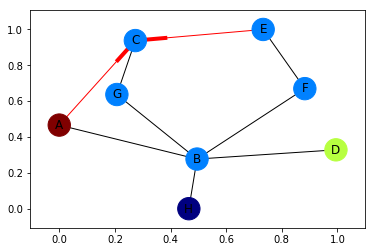

In [12]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

G = nx.DiGraph()
G.add_edges_from(
    [('A', 'B'), ('A', 'C'), ('D', 'B'), ('E', 'C'), ('E', 'F'),
     ('B', 'H'), ('B', 'G'), ('B', 'F'), ('C', 'G')])

val_map = {'A': 1.0,
           'D': 0.5714285714285714,
           'H': 0.0}

values = [val_map.get(node, 0.25) for node in G.nodes()]

# Specify the edges you want here
red_edges = [('A', 'C'), ('E', 'C')]
edge_colours = ['black' if not edge in red_edges else 'red'
                for edge in G.edges()]
black_edges = [edge for edge in G.edges() if edge not in red_edges]

# Need to create a layout when doing
# separate calls to draw nodes and edges
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), 
                       node_color = values, node_size = 500)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edgelist=red_edges, edge_color='r', arrows=True)
nx.draw_networkx_edges(G, pos, edgelist=black_edges, arrows=False)
plt.show()